# Day 2: Exploring tabulated data with Pandas

Pandas is the best-in-slot tabulated data package in Python. Due to its immense popularity there is a vast variety of functionality build into it and a wealth of resources available on working with Pandas online. To start things off we will import pandas and give it the nickname 'pd' (Once again a convention within the Python community).

In [1]:
# We import pandas and abbreviate it to pd
import pandas as pd
# We are also going to need matplotlib to plot our data
import matplotlib.pyplot as plt

So first let us open our dear friend: the Microsoft Excel file.

In [2]:
# We can point to an Excel file by providing the path to the file
excel_file = pd.ExcelFile("./data/Tabulated/CTS_Database.xlsx")

There is a few things to note from our previous cell of code:
- First: We declare the Excel file like we would a variable. We need an object to contain the data of the Excel file.
- Secondly: We use the ExcelFile method of pandas to open Excel Files.
- Third: We use the file path relative to the script to locate the file. 

We can see which sheets are in the Excel file by calling the sheet_names property of Excel File

In [3]:
# And see the name of each sheet by
excel_file.sheet_names

['BasicInf', 'Time WL', 'BH Geology']

Let's inspect the Time Waterlevel sheet. A sheet can of course contain a lot of data. So if we just want to view the top few records of a sheet we do so with the .head() method.
- You can also specify a number within the parenthesis of the method to show that many record (e.g. .head(10) to show the first 10 records.)

In [4]:
# We can open a specific sheet as follows
df_wl = excel_file.parse("Time WL")
# And take a peak at the files contents
df_wl.head()

,SiteName,DateTimeMeas,Waterlevel,Status
0,D1,2005-04-04 08:15:00,12.72,NaN
1,D1,2005-07-01 00:00:00,12.81,NaN
2,D1,2005-07-01 14:00:00,12.81,NaN
3,D1,2005-07-04 00:00:00,12.72,NaN
4,D1,2005-07-05 08:35:00,14.52,NaN


For some more information regarding the number of records and the different types of columns present in the sheet we can use the .info() method:

In [5]:
# We can get some information
df_wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SiteName      690 non-null    object        
 1   DateTimeMeas  690 non-null    datetime64[ns]
 2   Waterlevel    690 non-null    float64       
 3   Status        0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 21.7+ KB


From the above we can see that there are four columns in the sheet, with a total of 690 records. The .info() method will also tell us the data type of each column.

Now let us get a list of the unique SiteNames present in the sheet:

In [6]:
print(df_wl["SiteName"].unique())

['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'DC1' 'DC2' 'UO1' 'UO13' 'UO14' 'UO18P1'
 'UO18P2' 'UO19' 'UO2' 'UO20' 'UO23' 'UO24' 'UO25' 'UO26' 'UO27' 'UO28'
 'UO29' 'UO3' 'UO30' 'UO4' 'UO5' 'UO6' 'UO7' 'UP15' 'UP16' 'UO27P3'
 'UO28P3' 'UO29P3' 'NH3']


From the above code we can see that columns are indexed the same way we would a list or dictionary, except instead of an index we provide the name of the column. Then once we have the data for just that column we then proceed to call the .unique() method to get all unique values in that column.

Using the above list, let's take a look at the last unique SiteName: NH3. In order to get all the records matching the SiteName NH3 we will use the .loc method of the dataframe. When using the .loc method we do provide parenthesis, but instead provide square brackets to indicate the range we are interested in. Then within the square brackets we use a statement that effectively says:

From our dataframe, get me each record whose SiteName column is equal to NH3.

In [7]:
# If we only want to look at one borehole's data
df_NH3 = df_wl.loc[df_wl["SiteName"] == "NH3"]
df_NH3.head()

,SiteName,DateTimeMeas,Waterlevel,Status
412,NH3,2019-06-12 20:00:00,13.7800,NaN
413,NH3,2019-06-13 08:00:00,13.8900,NaN
414,NH3,2019-06-13 20:00:00,13.9399,NaN
415,NH3,2019-06-14 08:00:00,13.9700,NaN
416,NH3,2019-06-14 20:00:00,13.9900,NaN


Since we are now looking at only NH3 in the new df_NH3 dataframe, we don't need that SiteName column anymore. So let us make the DateTimeMeas our new index column and get rid of the NH3 column. While we are at it we will also delete the Status column which doesn't contain any records.

In [8]:
# Let's make the DateTimeMeas the index of the table
df_NH3.set_index("DateTimeMeas", inplace=True)
# And drop the status and sitename columns
df_NH3 = df_NH3.drop(columns=["SiteName", "Status"])
df_NH3.head()

,Waterlevel
DateTimeMeas,
2019-06-12 20:00:00,13.7800
2019-06-13 08:00:00,13.8900
2019-06-13 20:00:00,13.9399
2019-06-14 08:00:00,13.9700
2019-06-14 20:00:00,13.9900


Now that we just have the DateTimeMeas and Waterlevel columns for NH3, let's get some basic statistics for the data using the .describe() method of the dataframe:

In [9]:
# Get a description of our data
df_NH3.describe()

,Waterlevel
count,278.000000
mean,12.604037
std,1.225599
min,10.270000
25%,11.424900
50%,12.914950
75%,13.770000
max,14.069900


We can use these basic statistics to determine if any outliers are present and if we need to modify the data. In this case, we can see that we have 278 waterlevels, with an average waterlevel of approximately 12.6 meters below ground level. Both the maximum and minimum values appear valid. 

Now the best way to further explore the data would be to first plot a graph of the data. Pandas provides build-in methods to automatically plot data for us with matplotlib, let's take a look at the code:

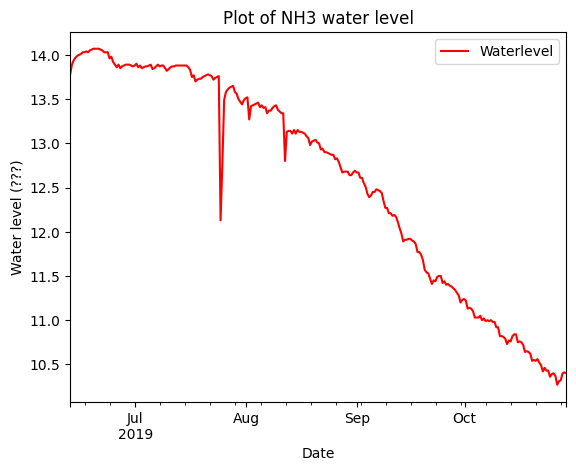

In [10]:
# Plot the data
df_NH3.plot(
    kind="line",
    color="red",
    xlabel="Date",
    ylabel="Water level (???)",
    title="Plot of NH3 water level"
)
# Show the figure
plt.show()

The code to plot the figure looks a bit different when we use Pandas, let's break it down:
- We call the .plot() method on the dataframe to plot it.
- Additionally, we can define some parameters to customise the plot
- With the "kind" property we define what kind of graph we would like.
- The "color" property is self explanatory.
- "xlabel" and "ylabel" is used to give title to the x- and y-axis respectively.
- The "title" propoerty is also self explanatory.

And voila, we have a graph. However, it is clear that something is wrong here. This data appears to be measuring the waterlevel from a certain datum located below the water level. In reality, this is data freshly extracted from a pressure transducer which has not been converted to meters below ground level yet. Let us correct that, the water level measured in NH3 when the pressure transducer was removed (the final reading) is 15.5 mbgl. Let's convert the data to the new datum:

In [11]:
# First, let us get the last water level recording from the data
last_record = df_NH3["Waterlevel"].iloc[-1]
print(last_record)

10.400000000000091


The process was similar to what we used before. First, we only grab the Waterlevel column from the dataset and then we get the last position by using the index locator (.iloc) method and the same indexing style we would use with a list. With this we get a water level of 10.40 meters above datum, which is then equivalent to our 15.5 mbgl measurement. This puts the installation depth of our logger at:

15.5 + 10.4 = 25.9 mbgl

Now we can change our data to mbgl by subtracting the recorded value from this number:

In [12]:
df_NH3["CorrWaterlevel"] = 25.9 - df_NH3["Waterlevel"]
df_NH3.describe()

,Waterlevel,CorrWaterlevel
count,278.000000,278.000000
mean,12.604037,13.295963
std,1.225599,1.225599
min,10.270000,11.830100
25%,11.424900,12.130000
50%,12.914950,12.985050
75%,13.770000,14.475100
max,14.069900,15.630000


Now we can plot our data again, but since our dataframe has two data columns now we will specify that it needs to only plot the corrected waterlevel column:

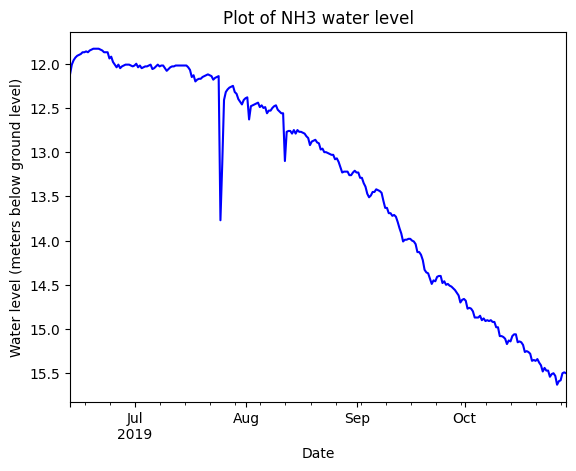

In [13]:
# Plot the data
df_NH3["CorrWaterlevel"].plot(
    kind="line",
    color="blue",
    xlabel="Date",
    ylabel="Water level (meters below ground level)",
    title="Plot of NH3 water level"
)
# Since we are now working with mbgl, it would help visualisation to invert the y-axis
plt.gca().invert_yaxis()
# Show the figure
plt.show()

And that is exactly what we expected to see. Let us now move on to some common parts of data exploration and preparation. Anyone that has worked with real data knows how messy it can be. We will now explore some common workflows for handling data.

# Data Quality Checks and Fixes

First, let us open the BasicInfo sheet of the WISH database.

In [14]:
# We can open the basic info sheet as follows
df_basic = excel_file.parse("BasicInf")
# And take a peak at the files contents
df_basic.head()

,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
0,CH1,B,-3.221348e+06,-78915.680829,1410.72,0.21,0.085,30.0,University of the Free State,IGS,Core
1,CH2,B,-3.221368e+06,-78941.880733,1410.85,0.17,0.085,30.0,University of the Free State,IGS,Core
2,CH3,B,-3.221366e+06,-78929.960776,1410.93,0.22,0.085,30.0,University of the Free State,IGS,Core
3,CH4,B,-3.221401e+06,-78902.230873,1411.30,0.14,0.085,30.0,University of the Free State,IGS,Core
4,CH5,NaN,NaN,NaN,1410.72,NaN,NaN,NaN,NaN,NaN,NaN


Now, let us look at how to handle a common problem: duplicates in our data.

In [15]:
complete_duplicates = df_basic[df_basic.duplicated() == True]
complete_duplicates

,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
60,UO22,B,-3.221460e+06,-78988.210559,1413.06,0.000,0.17,34.0,University of the Free State,IGS,INSIDE WEATHER AREA
61,UO8,B,-3.221365e+06,-78932.498507,1410.97,0.225,0.17,41.0,University of the Free State,IGS,BLOCKED
62,NH2,B,-3.221377e+06,-78949.810000,1418.00,0.540,0.17,30.0,University of the Free State,IGS,2016 Honour's Drilling


We can remove the complete duplicates by calling the .drop_duplicates() method of the dataframe and passing no arguments.

In [16]:
# The drop duplicates method will drop all records that are complete duplicates of another one
df_basic = df_basic.drop_duplicates()

If we want to find all duplicates just based on a specific column then we specify that column. The "keep" property is usually true by default. Here we set it to False so that it shows us the duplicates and the first instance of the same name:

In [17]:
duplicate_names = df_basic[df_basic.duplicated('SiteName', keep=False) == True]
duplicate_names

,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
42,D1,B,-3.221439e+06,-79003.068507,1413.224,0.0,0.17,23.5,University of the Free State,IGS,Destroyed?
43,D2,B,-3.221434e+06,-79001.622512,1413.090,0.0,0.17,23.0,University of the Free State,IGS,NaN
44,D3,B,-3.221434e+06,-79003.978504,1413.203,0.0,0.17,23.0,University of the Free State,IGS,NaN
45,D4,B,-3.221435e+06,-78999.131521,1413.027,0.0,0.17,23.0,University of the Free State,IGS,BLOCKED
63,D1,B,-3.221439e+06,-79003.060000,1413.200,NaN,0.17,23.5,University of the Free State,IGS,NaN
64,D2,B,-3.221434e+06,-79001.610000,1413.100,NaN,0.17,23.0,University of the Free State,IGS,NaN
65,D3,B,-3.221434e+06,-79003.963000,1413.200,NaN,0.17,23.0,University of the Free State,IGS,NaN
66,D4,B,-3.221435e+06,-78999.130000,1413.020,NaN,0.17,23.0,University of the Free State,IGS,NaN


It's clear that the duplicates which are the second instance of the name has the same values, just at a lower accuracy than the first instances. So we will drop the second instances using the .drop_duplicates() method and passing the column that we would like to be checked. Note that 'keep' property is now kept at its default value, which will keep the first instance of a SiteName but remove and duplicates following it.

In [18]:
df_basic = df_basic.drop_duplicates('SiteName')

Now, let's look at some information regarding our dataframe:

In [19]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SiteName      60 non-null     object 
 1   SiteType      57 non-null     object 
 2   Ycoord        57 non-null     float64
 3   Xcoord        57 non-null     float64
 4   Zcoord        60 non-null     float64
 5   CollarHeight  57 non-null     float64
 6   Diameter      46 non-null     float64
 7   Depth         43 non-null     float64
 8   Sub Area      57 non-null     object 
 9   Owner         55 non-null     object 
 10  Description   42 non-null     object 
dtypes: float64(6), object(5)
memory usage: 5.6+ KB


Next, let's drop the records where Xcoord or Ycoord is missing. But first, we'll make a dataframe listing those values so that we can send it to our client for feedback.

In [20]:
df_missing_coords = df_basic[df_basic['Xcoord'].isna() | df_basic['Ycoord'].isna()]
df_missing_coords.to_excel('.\output\missing_coordinates.xlsx')  # Show how to fix the warning
df_missing_coords

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Anton\AppData\Local\Temp\ipykernel_140312\4264476793.py:2: SyntaxWarning: invalid escape sequence '\o'
  df_missing_coords.to_excel('.\output\missing_coordinates.xlsx')  # Show how to fix the warning


,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
4,CH5,NaN,NaN,NaN,1410.72,NaN,NaN,NaN,NaN,NaN,NaN
5,CH6,NaN,NaN,NaN,1411.03,NaN,NaN,NaN,NaN,NaN,NaN
6,CH7,NaN,NaN,NaN,1413.26,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_basic = df_basic.dropna(subset=['Xcoord', 'Ycoord'])
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 59
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SiteName      57 non-null     object 
 1   SiteType      57 non-null     object 
 2   Ycoord        57 non-null     float64
 3   Xcoord        57 non-null     float64
 4   Zcoord        57 non-null     float64
 5   CollarHeight  57 non-null     float64
 6   Diameter      46 non-null     float64
 7   Depth         43 non-null     float64
 8   Sub Area      57 non-null     object 
 9   Owner         55 non-null     object 
 10  Description   42 non-null     object 
dtypes: float64(6), object(5)
memory usage: 5.3+ KB


That problem is solved, let's look at some statistics of the dataaset:

In [22]:
df_basic.describe()

,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth
count,5.700000e+01,5.700000e+01,57.000000,57.000000,46.000000,43.000000
mean,-3.111128e+06,-1.892072e+05,1411.856491,0.194351,0.162609,44.397674
std,5.833473e+05,5.833500e+05,1.303370,0.143250,0.024215,90.073971
min,-3.221461e+06,-3.221388e+06,1410.420000,0.000000,0.085000,-41.000000
25%,-3.221397e+06,-7.897098e+04,1410.970000,0.000000,0.170000,24.750000
50%,-3.221376e+06,-7.893636e+04,1411.459000,0.220000,0.170000,30.000000
75%,-3.221367e+06,-7.892727e+04,1412.830000,0.265000,0.170000,41.000000
max,-7.893296e+04,-7.887923e+04,1418.000000,0.540000,0.170000,613.000000


From the statistics we can see we have some coordinates which have been swapped around. Let's fix that:

In [23]:
swapped = df_basic[df_basic['Xcoord'] < -1000000]  # assuming Y will be a larger negative value than X
swapped

,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
21,UO21,B,-79030.730415,-3.221346e+06,1411.46,0.00,0.17,38.0,University of the Free State,IGS,DESTROYED
38,UP15,B,-78932.960763,-3.221388e+06,1411.41,0.17,0.17,41.0,University of the Free State,IGS,NaN


Now that we know which two records have the problems, we can swap their coordinates around:

In [24]:
x_coord_UO21 = df_basic.loc[df_basic['SiteName'] == 'UO21']['Ycoord'].iloc[0]
y_coord_UO21 = df_basic.loc[df_basic['SiteName'] == 'UO21']['Xcoord'].iloc[0]

df_basic.loc[df_basic['SiteName'] == 'UO21', 'Xcoord'] = x_coord_UO21
df_basic.loc[df_basic['SiteName'] == 'UO21', 'Ycoord'] = y_coord_UO21

x_coord_UP15 = df_basic.loc[df_basic['SiteName'] == 'UP15']['Ycoord'].iloc[0]
y_coord_UP15 = df_basic.loc[df_basic['SiteName'] == 'UP15']['Xcoord'].iloc[0]

df_basic.loc[df_basic['SiteName'] == 'UP15', 'Xcoord'] = x_coord_UP15
df_basic.loc[df_basic['SiteName'] == 'UP15', 'Ycoord'] = y_coord_UP15

df_basic.describe()

,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth
count,5.700000e+01,57.000000,57.000000,57.000000,46.000000,43.000000
mean,-3.221387e+06,-78948.025221,1411.856491,0.194351,0.162609,44.397674
std,2.991187e+01,34.325033,1.303370,0.143250,0.024215,90.073971
min,-3.221461e+06,-79030.730415,1410.420000,0.000000,0.085000,-41.000000
25%,-3.221397e+06,-78970.984699,1410.970000,0.000000,0.170000,24.750000
50%,-3.221376e+06,-78936.363752,1411.459000,0.220000,0.170000,30.000000
75%,-3.221368e+06,-78927.270786,1412.830000,0.265000,0.170000,41.000000
max,-3.221340e+06,-78879.230959,1418.000000,0.540000,0.170000,613.000000


We can see we also have some problems in the Depth column. Let's look for unrealistic depth values and put them in a dataframe to send to our client:

In [25]:
df_invalid_depth = df_basic[(df_basic['Depth'] < 0) | (df_basic['Depth'] > 500)]
df_invalid_depth.to_excel(r'.\output\invalid_depth.xlsx')
df_invalid_depth

,SiteName,SiteType,Ycoord,Xcoord,Zcoord,CollarHeight,Diameter,Depth,Sub Area,Owner,Description
16,UO18P1,B,-3.221376e+06,-78909.930847,1410.69,0.395,0.17,613.0,University of the Free State,IGS,2X PIEZOMETERS
33,UO5,B,-3.221367e+06,-78927.697784,1410.93,0.215,0.17,-41.0,University of the Free State,IGS,NaN


And that concludes our examples for DataFrames and Pandas. Now let's start practicing:

# DataFrame Exercise:

Prepare and clean the borehole database provided in the file "borehole_data.csv". A few of the problems we discussed today is present in the database. With the help of the examples above prepare the database for use. The file is loaded for you in the cell below. Add as many cells as you wish to complete this exercise.

In [26]:
# First we open the file into a pandas dataframe
df_csv = pd.read_csv("./data/Tabulated/borehole_data.csv")
df_csv.head()

,BoreholeName,Xcoord,Ycoord,Zcoord,StaticWaterLevel,Collar
0,BH001,345678,765432.0,123.5,12.3,0.28
1,BH002,345679,765433.0,NaN,10.2,0.49
2,BH003,765434,345680.0,121.0,-5.6,0.34
3,BH004,345681,765435.0,124.2,9.8,0.09
4,BH005,345682,765436.0,124.9,11.1,0.59


In [27]:
# Start from here